In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional

In [2]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Seoul_Temp.csv'
temp = pd.read_csv(url)
temp.head()

,date,avg,min,max
0,2011-01-01,-6.8,-10.4,-2.9
1,2011-01-02,-5.4,-8.5,-1.2
2,2011-01-03,-4.5,-8.5,-0.3
3,2011-01-04,-3.9,-7.4,-1.7
4,2011-01-05,-4.0,-7.7,-1.8


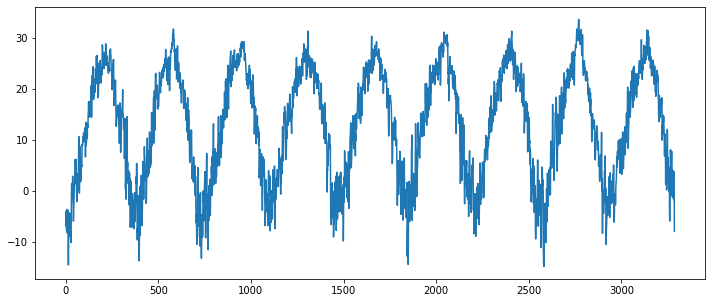

In [3]:
temp_data = temp[['avg']]
plt.figure(figsize = (12, 5))
plt.plot(temp_data)
plt.show()

In [4]:
scaler = MinMaxScaler(feature_range=(-1,1))
temp_data = scaler.fit_transform(temp_data)

In [5]:
train = temp_data[0:2557]
test = temp_data[2557:]

In [9]:
np.array([train]).shape()

TypeError: 'tuple' object is not callable

In [12]:
def create_dataset(time_data, look_back=1):
    data_X, data_y =[],[]
    
    for i in range(len(time_data)-look_back):
        data_X.append(time_data[i:(i+look_back)])
        data_y.append(time_data[i+look_back])
        
    print(time_data.shape)
    return np.array(data_X), np.array(data_y)

In [14]:
look_back = 180
train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

(2557, 1)
(730, 1)


((2377, 180, 1), (2377, 1), (550, 180, 1), (550, 1))

In [15]:
model = Sequential()
model.add(Bidirectional(LSTM(64,input_shape = (None, 1))))
model.add(Dense(1, activation = 'tanh'))

#model.summary()

model.compile(loss = 'mean_squared_error', optimizer='adam')

In [16]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.33
session = InteractiveSession(config = config)

In [18]:
%%time
hist = model.fit(train_X, train_y,epochs = 200, batch_size = 180,validation_data = (test_X, test_y))

Epoch 1/200
14/14 [==============================] - 1s 66ms/step - loss: 0.0177 - val_loss: 0.0158
Epoch 2/200
14/14 [==============================] - 1s 69ms/step - loss: 0.0174 - val_loss: 0.0158
Epoch 3/200
14/14 [==============================] - 1s 72ms/step - loss: 0.0171 - val_loss: 0.0156
Epoch 4/200
14/14 [==============================] - 1s 66ms/step - loss: 0.0169 - val_loss: 0.0158
Epoch 5/200
14/14 [==============================] - 1s 69ms/step - loss: 0.0167 - val_loss: 0.0153
Epoch 6/200
14/14 [==============================] - 1s 71ms/step - loss: 0.0165 - val_loss: 0.0152
Epoch 7/200
14/14 [==============================] - 1s 66ms/step - loss: 0.0164 - val_loss: 0.0161
Epoch 8/200
14/14 [==============================] - 1s 77ms/step - loss: 0.0162 - val_loss: 0.0150
Epoch 9/200
14/14 [==============================] - 1s 71ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 10/200
14/14 [==============================] - 1s 68ms/step - loss: 0.0161 - val_loss: 0.0145

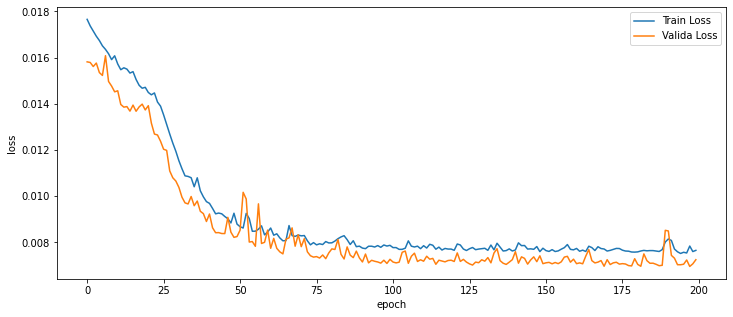

In [19]:
plt.figure(figsize=(12,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train Loss', 'Valida Loss'], loc='upper right')
plt.show()

In [20]:
trainScore = model.evaluate(train_X, train_y, verbose = 0)
print('Train Score: ', trainScore)
testScore = model.evaluate(test_X, test_y, verbose = 0)
print('Test Score: ', testScore)

Train Score:  0.007666854653507471
Test Score:  0.007249327842146158
